In [2]:
import pandas as pd
from pandas import DataFrame
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def count_arithmetic_characters(s):
    arithmetic_characters = "+-*/"
    count = 0

    for c in str(s):
        if c in arithmetic_characters:
            count += 1

    return count

In [8]:
df_base = pd.read_csv("evaluation/meta-llama/Llama-2-13b-chat-hf/no_peft/analysed_results_base.csv")
df_base["model"] = "Llama 2 13B chat"

df_raven_notools = pd.read_csv("evaluation/meta-llama/Llama-2-13b-chat-hf/unwilledset/raven-13b-chat-d8-no-tools/analysed_results_no_tools.csv")
df_raven_notools["model"] = "Raven"
df_raven_notools = df_raven_notools[df_raven_notools["template"] != "template"]

df_raven = pd.read_csv("evaluation/meta-llama/Llama-2-13b-chat-hf/unwilledset/raven-13b-chat-d8/analysed_results.csv")
df_raven["model"] = "Raven+Tools"
df_raven = df_raven[df_raven["template"] != "template"]

df = pd.concat([df_base, df_raven_notools, df_raven])



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20062 entries, 0 to 6687
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20062 non-null  int64  
 1   source       20062 non-null  object 
 2   template     20062 non-null  object 
 3   instruction  20062 non-null  object 
 4   input        8642 non-null   object 
 5   data         12631 non-null  object 
 6   gold         20002 non-null  object 
 7   gold_eval    6886 non-null   object 
 8   pred         19935 non-null  object 
 9   pred_eval    2252 non-null   object 
 10  measure      20062 non-null  float64
 11  model        20062 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.0+ MB


In [9]:
df_tat_qa = df[df["source"] == "tat-qa"]
df_tat_qa["complexity"] = df_tat_qa["gold_eval"].apply(count_arithmetic_characters)
df_tat_qa.head()

/tmp/ipykernel_1397/486312407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tat_qa["complexity"] = df_tat_qa["gold_eval"].apply(count_arithmetic_characters)


,Unnamed: 0,source,template,instruction,input,data,gold,gold_eval,pred,pred_eval,measure,model,complexity
5363,3852,tat-qa,arithmetic,What was the percentage change in the amount f...,Net sales by segment and industry end market(1...,"{""header"": ["""", """", ""Fiscal"", """"], ""rows"": [[""...",-12.14,(680-774)/774,8.4%,NaN,0.0,Llama 2 13B chat,2
5364,3853,tat-qa,arithmetic,What is the percentage change in the net defer...,NOTE 13 - TAXES ON INCOME B. Deferred income t...,"{""header"": ["""", ""December 31"", """"], ""rows"": [[...",2.98,(795-772)/772,% change in net deferred tax asset = (795 - 77...,NaN,0.0,Llama 2 13B chat,2
5365,3854,tat-qa,table,How much is the 2019 free cash flow ?,Cash flow measures and capital additions In pr...,"{""header"": ["""", ""2019"", ""2018"", ""2017""], ""rows...","4,411",NaN,"2019: 4,411",NaN,0.0,Llama 2 13B chat,0
5366,3855,tat-qa,table,In which year were Acquisition and integration...,Operating income included the following: (1) R...,"{""header"": ["""", """", ""Fiscal""], ""rows"": [["""", ""...",2019,27>14,$ 2018,NaN,0.0,Llama 2 13B chat,0
5367,3856,tat-qa,table,Where is the performance-based award classific...,Stock-Based Compensation Expense and Valuation...,"{""header"": ["""", ""Year Ended May 31,"", """", """"],...",these awards met the performance-based award c...,NaN,$10.77,NaN,0.0,Llama 2 13B chat,0


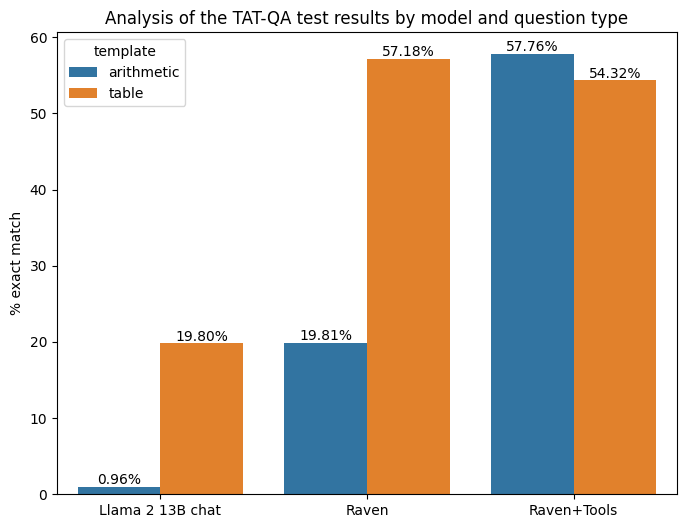

In [10]:
# Calculate the sum of "measure" divided by the count of rows, grouped by "template"


#df_tat_qa.loc[[1601, 1960, 2177, 2247, 2394, 2460, 2974, 3114, 3230, 3587, 3623, 3667, 3685, 4054, 4177, 4225, 4247, 4250, 4258, 4407, 4433, 4499, 4677, 4795, 4879, 4928], "measure"] = 1

df_tat_qa = df[df["source"] == "tat-qa"]

grouped_data = df_tat_qa.groupby(["template", "model"])["measure"].sum() / df_tat_qa.groupby(["template", "model"])["measure"].count() * 100
grouped_data = grouped_data.reset_index()  # Reset the index for plotting

# Create the column chart using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="model", y="measure", hue="template", data=grouped_data)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")

# Set plot labels and title
plt.xlabel("")
plt.ylabel("% exact match")
plt.title("Analysis of the TAT-QA test results by model and question type")

# Show the plot
# plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])

plt.show()

In [130]:
df_tat_qa[(df_tat_qa["source"]=="tat-qa") & (df_tat_qa["model"]=="raven+tools")].loc[1601]["measure"] = 1


,Unnamed: 0,source,template,instruction,input,data,gold,gold_eval,pred,pred_eval,measure,model
1601,90,tat-qa,arithmetic,What percentage of the total amortized cost is...,The following tables summarize the unrealized ...,"{""header"": ["""", """", ""As of December 31, 2019"",...",43.15,"73,798/171,021",5.55,NaN,0.0,raven
1601,90,tat-qa,arithmetic,What percentage of the total amortized cost is...,The following tables summarize the unrealized ...,"{""header"": ["""", """", ""As of December 31, 2019"",...",43.15,"73,798/171,021",0.43,73798/171021,0.0,raven+tools


In [99]:
df_tat_qa_arith = df_tat_qa[(df_tat_qa["template"] == "arithmetic") & (df_tat_qa["model"] == "raven+tools")]

grouped_data = df_tat_qa_arith.groupby("complexity")["measure"].agg(["sum", "count"])
grouped_data["% exact match"] = grouped_data["sum"] / grouped_data["count"] * 100
grouped_data.reset_index()  # Reset the index for plotting
grouped_data

,sum,count,% exact match
complexity,,,
0,2.0,48,4.166667
1,176.0,299,58.862876
2,154.0,212,72.641509
3,21.0,47,44.680851
4,4.0,8,50.000000
5,4.0,9,44.444444
6,0.0,1,0.000000
7,0.0,1,0.000000


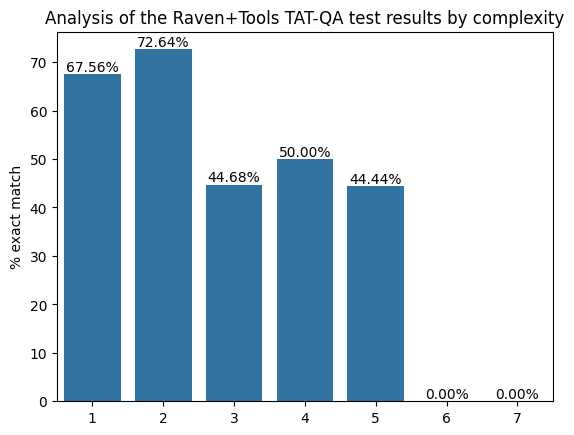

In [135]:
# these were supposed to be exact match
df_tat_qa_arith.loc[[1601, 1960, 2177, 2247, 2394, 2460, 2974, 3114, 3230, 3587, 3623, 3667, 3685, 4054, 4177, 4225, 4247, 4250, 4258, 4407, 4433, 4499, 4677, 4795, 4879, 4928], "measure"] = 1

# grouped_data = df_tat_qa_arith.groupby("complexity")["measure"].sum() / df_tat_qa_arith.groupby(["complexity"])["measure"].count() * 100
grouped_data = df_tat_qa_arith[df_tat_qa_arith["complexity"] != 0].groupby("complexity").agg({
    "measure": lambda x: x.sum() / x.count() * 100,
     
    })

grouped_data = grouped_data.reset_index()  # Reset the index for plotting

ax = sns.barplot(x="complexity", y="measure", data=grouped_data)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f%%")

# Set plot labels and title
plt.xlabel("")
plt.ylabel("% exact match")
plt.title("Analysis of the Raven+Tools TAT-QA test results by complexity")

# Show the plot
# plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])

plt.show()

In [105]:
def division_op(s: str):
    return 1 if "/" in s else 0

df_tat_qa_arith["division_op"] = df_tat_qa_arith["gold_eval"].apply(division_op)
df_tat_qa_arith_2 =  df_tat_qa_arith[(df_tat_qa_arith["complexity"] == 1) & (df_tat_qa_arith["measure"] == 0) & (df_tat_qa_arith["division_op"] == 1)]

df_tat_qa_arith_2

df_tat_qa_arith.iloc[1601]


/tmp/ipykernel_301439/2952473916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tat_qa_arith["division_op"] = df_tat_qa_arith["gold_eval"].apply(division_op)


,Unnamed: 0,source,template,instruction,input,data,gold,gold_eval,pred,pred_eval,measure,model,complexity,division_op
1601,90,tat-qa,arithmetic,What percentage of the total amortized cost is...,The following tables summarize the unrealized ...,"{""header"": ["""", """", ""As of December 31, 2019"",...",43.15,"73,798/171,021",0.43,73798/171021,0.0,raven+tools,1,1
1892,381,tat-qa,arithmetic,What is the percentage constitution of cash in...,Refranchisings and franchisee development The...,"{""header"": ["""", ""2019"", ""2018"", ""2017""], ""rows...",93.7,"1,280/1,366",0.03,1280/46164,0.0,raven+tools,1,1
1904,393,tat-qa,arithmetic,What is the ratio of inventory reserves to acc...,Components of the net deferred income tax asse...,"{""header"": ["""", ""March 31,"", """"], ""rows"": [[""(...",2.65,948/358,1.84,757/412,0.0,raven+tools,1,1
1907,396,tat-qa,arithmetic,What was the percentage of total financial ass...,28 Derivatives and other financial instruments...,"{""header"": ["""", ""Total"", ""Fixed rate financial...",26.83,115.9/431.9,0.02,6.8/431.9,0.0,raven+tools,1,1
1960,449,tat-qa,arithmetic,What is the percentage of non-vested shares gr...,8. Stock option and award plan: (Continued) A ...,"{""header"": [""Non-vested awards"", ""Shares"", ""We...",36.9,"473,550/1,283,281",0.37,473550/1283281,0.0,raven+tools,1,1
1988,477,tat-qa,arithmetic,What percentage of Cloud & Cognitive Software ...,Cloud & Cognitive Software * Recast to reflect...,"{""header"": [""($ in millions)"", """", """", """", """"]...",34.21,"7,936 / 23,200",1.0,7936/7974,0.0,raven+tools,1,1
2131,620,tat-qa,arithmetic,"At the beginning of the financial year, what p...",V. INDEBTEDNESS Indebtedness of the Company in...,"{""header"": ["""", ""Secured loans excluding depos...",1.32,3/228,0.08,3/39,0.0,raven+tools,1,1
2177,666,tat-qa,arithmetic,What is the percentage of Israel's loss from c...,NOTE 13 - TAXES ON INCOME (Cont.) D. Loss from...,"{""header"": ["""", ""Year ended December 31"", """"],...",81.17,"18,875/23,253",0.81,18875/23253,0.0,raven+tools,1,1
2247,736,tat-qa,arithmetic,What is the Sales and marketing costs expresse...,Fiscal 2019 compared to fiscal 2018 The follow...,"{""header"": ["""", ""Fiscal Year"", """"], ""rows"": [[...",45.71,32/70,0.46,32/70,0.0,raven+tools,1,1
2394,883,tat-qa,arithmetic,What is the percentage of long-term debt over ...,6.1 Net debt (1) 50% of outstanding preferred ...,"{""header"": ["""", ""2019"", ""2018"", ""$ CHANGE"", ""%...",79.62,"22,415/28,153",0.8,22415/28153,0.0,raven+tools,1,1


,Unnamed: 0,source,template,instruction,input,data,gold,gold_eval,pred,pred_eval,measure,model,complexity,division_op
1601,90,tat-qa,arithmetic,What percentage of the total amortized cost is...,The following tables summarize the unrealized ...,"{""header"": ["""", """", ""As of December 31, 2019"",...",43.15,"73,798/171,021",0.43,73798/171021,1.0,raven+tools,1,1
1960,449,tat-qa,arithmetic,What is the percentage of non-vested shares gr...,8. Stock option and award plan: (Continued) A ...,"{""header"": [""Non-vested awards"", ""Shares"", ""We...",36.9,"473,550/1,283,281",0.37,473550/1283281,1.0,raven+tools,1,1
